<a href="https://colab.research.google.com/github/solisti/Group1Project3/blob/project4/Project4_ImageTextTranslator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Text Translator
Click the "Open in Colab" link to open this Jupyter Notebook in Google Colab. In Google Colab, click on the file icon (with up arrow) in the Files pane on the left to upload an image file and a font file. By default, files are placed in /contents, which is also the default working directory. Refresh the Files pane by clicking the folder icon with round arrow.

In [ ]:
# Run this block to install pytesseract and translate (Python libraries)
# and tesseract-ocr (from Ubuntu repo), which are not installed
# in Google's Ubuntu vm. Need to re-run the block if session times out 
# after period of un-use. But the installs are fast.

# The following will show whether or not pytesseract is installed.
# It just prints 0 if installed, or else an error message.
# ! python -c "import pytesseract"
# ! echo $?

# PIL is already installed in Google's Ubuntu vm (Bionic, 18.0.4)
# ! python -c "import PIL"
# ! echo $?

# In newer Debian and Ubuntu repos the default is now Pillow.
# To install on your own Debian/Ubuntu system: 
# apt install python3-pil and
# apt install python3-pil.imgagetk (that installs Pillow now). May not need pil.imagetk.

# PIL (Pillow) tutorial: https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

# next istall is documented here: https://pypi.org/project/pytesseract/
! pip install pytesseract

# next install is documented here: https://pypi.org/project/translate/
! pip install translate

# next install is documented here: https://tesseract-ocr.github.io/tessdoc/Home.html
# This is not a Python library (can't insall with pip or conda).
! apt install tesseract-ocr


In [ ]:
# This shows that tesseract is installed (and its location)
! which tesseract

In [ ]:
# Install the desired languages for tesseract-ocr:
# Add (or comment out) languages as desired.
# The 3-letter language codes (and language files if needed) can be found here: 
# https://tesseract-ocr.github.io/tessdoc/Data-Files.html

# simplified Chinese
! apt install tesseract-ocr-chi-sim

# Hungarian
! apt install tesseract-ocr-hun

# German
# ! apt install tesseract-ocr-deu

# Spanish
# ! apt install tesseract-ocr-spa

# French
! apt install tesseract-ocr-fra

In [5]:
# check which languages are installed:
! tesseract --list-langs

List of available languages (5):
osd
chi_sim
fra
eng
hun


In [ ]:
# maybe helpful to print working directory and contents. 
# By default the working directory is /content, and uploaded files by default are placed there.
# You can also see the uploaded files in the Files pane on the left (may need to click the
# folder refresh icon).
! pwd
! ls

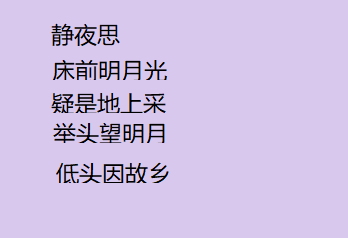

In [28]:
# Run this block to display an image file
from IPython.display import Image as DispImage

# To display an image file that is in the working directory:
# DispImage("ImageName.jpg") [change the code according to your file name]
DispImage ("Chinese5.jpg")

The following is the Image Text Tranlsator code block. It is also availabe as the imgtl.py file, which can be run on your local machine with python3. The program will ask you for a file path to your image file. Ideally this will be your working directory, and if so type:

./

In [31]:
from PIL import Image
import pytesseract
from translate import Translator
from PIL import ImageFont, ImageDraw, Image
import os # for methods that check if a filepath and a file exist

# The next line may not be needed. It is needed if tesseract is not in your PATH
# (Check path for tesseract and modify the line below if needed)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# This function handles the core OCR processing of the input image.
def ocr_core(filename, language):
    choice = 0
    if language == '1':
        choice = 'chi_sim'
    elif language == '2':
        choice = 'deu'
    elif language == '3':
        choice = 'hun'
    elif language == '4':
        choice = 'spa'
    elif language == '5':
        choice = 'fra'
    
    text = pytesseract.image_to_string(Image.open(filename), lang=choice)
    return text

# Writes text extracted from image into a txt file named "script.txt"
# which is saved in the same path as the input image file
def writefile(image_path, strstr):
	wordlist = strstr.split()
	with open(image_path + '/script.txt', 'a') as f:   
		f.writelines("\r".join(wordlist))

# Takes lines of text extracted from txt file and translates them, 
# outputs translated version into a txt file called "translated.txt" 
# and an image file with the translated text called Capture.JPG.
def translate_text(image_path, imagename, language, fontChoice, fontColorChoice):
    # sets target language and input language for translator
    choice = 0
    if language == '1':
        choice = "zh"
    elif language == '2':
        choice = 'de'
    elif language == '3':
        choice = 'hu'
    elif language == '4':
        choice = 'es'
    elif language == '5':
        choice = 'fr'
    translator = Translator(to_lang="en", from_lang=choice)

    # opens the OCR output file and reads each line into contents
    with open(image_path + '/script.txt', encoding='utf-8') as f:
        contents = f.readlines()

    # sets the dimensions and background color for the new image object
    oldimg = Image.open(image_path + "/" + imagename)  
    # Grab the size of the input image
    # Later we can choose a font size depending on input image size
    width, height = oldimg.size
    # enlarge the output image so text does not need to be tiny (for small input files)
    # width *= 2
    # height *= 2

    # Grab a color sample, to reproduce the background in the output image
    # The code obtains an rgb tuple at position (x,y) 
    background = oldimg.getpixel((5, 5))    # grabs pixel from upper left corner
    
    newimg  = Image.new( mode = "RGB", size = (width, height), color = background )

    # Generates a txt file and JPG image file from the translated txt file
    with open(image_path + '/translated.txt', 'a') as n:  # the 'a' argument means append
        movedown = 20   # variable to help draw multiple text lines to image. This is initial verticle position

        #sets font choice for output file
        if fontChoice == '1':
            customfont = "arial.ttf"
        elif fontChoice == '2':
            customfont = "times new roman.ttf"
        elif fontChoice == '3':
            customfont ="comic sans.ttf"

        # sets font color for output file
        if fontColorChoice == '1': #sets color to black
            customfill = (0, 0, 0)
        elif fontColorChoice == '2': #sets color to red
            customfill = (255,0,0)
        elif fontColorChoice == '3': #sets color to blue
            customfill = (0,0,255)
        elif fontColorChoice == '4': #sets color to pink
            customfill = (255, 192, 203)

        for line in contents:   # iterates thru each line of text in "contents"
            n.writelines(translator.translate(line) + "\n") # translate each line and write to file
            draw = ImageDraw.Draw(newimg)
            font = ImageFont.truetype(customfont, 20) # font size 20 should be scaled for image size 
            # In the next line, first 2 numbers are pixels to right and down of upper corner
            draw.text((5, movedown), translator.translate(line), fill=customfill, font=font) 
            movedown += 25
        newimg.save("Capture.JPG")
        newimg.show()  # I don't think this works

# Change the translator provider 
# Default is mymemory but it limits the number of translations per day.
# Template code to change provider:
# secret = '<your secret from Microsoft or DeepL>'
# translator = Translator(provider='<the name of the provider, eg. microsoft or deepl>', to_lang=to_lang, secret_access_key=secret)

# FUNCTIONS FOR TEST SUITE

# Analyses and outputs test results
def test_suite(path,filename,language):
    Test1=text_exist(path,filename,language)
    Test2=ocr_work()
    Test3=directory_valid(path)
    Test4=file_exist(filename)
    Test5=path_exist(path)
    Test6=textg1(path,filename,language)
    if Test1 == True:
       print("Test 1:Passed!")
    else:
       print("Test 1:Failed!")
    if Test2 == True:
       print("Test 2:Passed!")
    else:
       print("Test 2:Failed!")
    if Test3 == True:
       print("Test 3:Passed!")
    else:
       print("Test 3:Failed!")
    if Test4 == True:
       print("Test 4:Passed!")
    else:
       print("Test 4:Failed!")
    if Test5 == True:
       print("Test 5:Passed!")
    else:
       print("Test 5:Failed!")
    if Test6 == True:
       print("Test 6:Passed!")
    else:
      print("Test 6:Failed!")

# This test uses ocr_path to check if text exists in this image
def text_exist(path,filename,language):
    test=True
    text = ocr_core(path + "/" + filename, language)
    if text.isspace():
        test = False
    return test

# This test checks the very basics of whether ocr can read a singular word for yes
# in French
def ocr_work():
    frantext=ocr_core("/content/fyes.png", '5')
    if len(frantext) == 6:
        return True
    else:
        return False

#This test checks if directory is still valid
def directory_valid(path):
    valid = os.path.isdir(path)
    return valid

#This checks if file is still valid
def file_exist(userfile):
    valid = os.path.exists(userfile)
    return valid

#This checks if path is still valid
def path_exist(path):
    valid = os.path.exists(path)
    return valid

#This checks if the text read from ocr has more than one character
def textg1(path,filename,language):
    text = ocr_core(path + "/" + filename, language)
    if len(text) > 1:
        return True
    else:
        return False

# Function for running the standard OCR-Translation program
def run():
    # Obtain input path and file name from the user and check if valid
    error = 0
    while error == 0:
        path = input('file path: ')
        userfile = input('file name: ')

        #OS library methods that check if the user-entered file path and a file exist
        isPathExist = os.path.exists(path)
        isUserFileExist = os.path.exists(userfile)
        directoryValid = os.path.isdir(path) # if we check path, why also check directory?

        # Output error messages for bad user input for file path and file name
        #checks if directory is valid. Commented out because too many error messages
        # if(directoryValid == False):
            # print("Error: invalid directory")
        #checks for filepath validity
        if(isPathExist == False ):
            print("Error: invalid file path")
        #checks for file existance
        elif(isUserFileExist == False):
            print("Error: invalid File")
        else:
            error = 1

    # Obtain language choice and check if valid
    print("\nYou have 5 choices for input language. \nEnter 1 for Chinese, 2 for German, 3 for Hungarian, 4 for Spanish, or 5 for French.")
    error = 0
    while error ==0:
        inlanguage = input('Your language choice: ')
        if(inlanguage.isnumeric() == True and (int(inlanguage)==1 or int(inlanguage) ==2 or int(inlanguage)==3 or int(inlanguage) ==4 or int(inlanguage) ==5 )):
            error = 1
        else:
            print("Please enter a valid number (1 - 5).")
    
    # Obtain font style for output image and check if valid entry
    print("\nYou have 3 choices for output font. \nEnter 1 for Arial, 2 for Times New Roman , 3 for Comic Sans.")
    error = 0
    while error == 0: 
        fontChoice  = input('Your font choice:  ') 
        if fontChoice == '1' or fontChoice == '2' or fontChoice== '3':
            error = 1
        else:
            print("Invalid entry. Please enter a valid number, 1 - 3.")

    # Obtain font color choice from user and check if input is valid              
    print("\nYou have 4 choices for output font color. \nEnter 1 for black, 2 for red, 3 for blue, or 4 for pink.")
    error = 0
    while error == 0:
        fontColorChoice = input('Your font color choice: ')
        if fontColorChoice == '1'  or fontColorChoice == '2' or fontColorChoice == '3' or fontColorChoice == '4':
            error = 1
        else:
            print("Invalid entry. Please enter a valid number, 1 - 4.")

    # Perform OCR on the input image file and let user know when finished this step
    # Give user a choice to test the software
    print("\nDo you want to use the software normally, or test it with a test suite?")
    print("Enter 1 to use normally, enter 2 to test software function.")
    error = 0
    while error == 0:
        choice =input("Your choice: ")
        print('\n')
        if choice == '1' or '2':
            error = 1
        else:
            print("Please enter a valid entry: 1 or 2.\n")
    if choice =='2':
        test_suite(path,userfile,inlanguage)
    elif choice == '1':
        print("******Starting******")
        text = ocr_core(path + "/" + userfile, inlanguage)
        writefile(path, text)
        print("OCR of image " + userfile + " is done.")

        # Perform the translation step
        print("Now performing the translation.")
        print("The bigger your file, the longer the wait...")
        translate_text(path, userfile, inlanguage, fontChoice, fontColorChoice)

        print("~~~~~~Finished~~~~~~")

run()



file path: ./
file name: Chinese5.jpg

You have 5 choices for input language. 
Enter 1 for Chinese, 2 for German, 3 for Hungarian, 4 for Spanish, or 5 for French.
Your language choice: 1

You have 3 choices for output font. 
Enter 1 for Arial, 2 for Times New Roman , 3 for Comic Sans.
Your font choice:  1

You have 4 choices for output font color. 
Enter 1 for black, 2 for red, 3 for blue, or 4 for pink.
Your font color choice: 2

Do you want to use the software normally, or test it with a test suite?
Enter 1 to use normally, enter 2 to test software function.
Your choice: 1


******Starting******
OCR of image Chinese5.jpg is done.
Now performing the translation.
The bigger your file, the longer the wait...
~~~~~~Finished~~~~~~


The code above generates two text files and an image file. The script.txt file shows the original language, and translated.txt and Capture.JPG show the translation. To see these in the Files pane on the left, you may need to click the folder icon with round arrow (to refresh the pane). If you double-click a file name in the Files panel, it will open in a pane on the right. You can also run the next block for a quick peek at the generated .txt files.

In [ ]:
# See at least a part of each of the .txt files that are generated
!echo "The original:"
!head script.txt
!echo "..."
!echo "The translation:"
!head translated.txt
!echo "..."

You can see the output image file by running the next code block. The Capture.JPG file will be over-written the next time the translate_text method is run, so change the file name if you want to save it (or you can download the file: hover over the file name in the Files pane, and the three vertical dots give you the option to download).

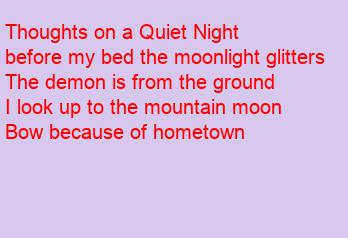

In [32]:
# See the image file:
from IPython.display import Image as DispImage # in case previous DispImage block was not run

DispImage ("Capture.JPG")

You need to remove the text files, because otherwise text will be appended to them when the writefile and translate_text methods are next run.

In [30]:
# remove the two text files for another round of playing
! rm script.txt
! rm translated.txt